**Importing Dataset** 


In [22]:
from google.colab import drive

In [23]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Main**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [25]:
train_datagen = ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, horizontal_flip= True, preprocessing_function = preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [42]:
train = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Dataset/train", target_size=(100,100), batch_size=32 )

val = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/Dataset/validation", target_size=(100,100), batch_size=32 )

Found 2684 images belonging to 4 classes.
Found 671 images belonging to 4 classes.


**Testing Image**

In [43]:
t_img , label = train.next()

In [44]:
def plotImage(img_arr, label):

  for im , l in zip(img_arr , label):
    plt.figure(figsize=(5,5)) 
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


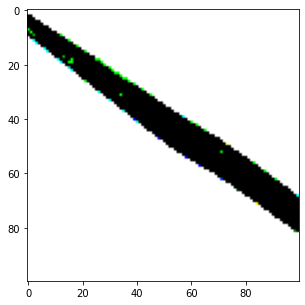

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


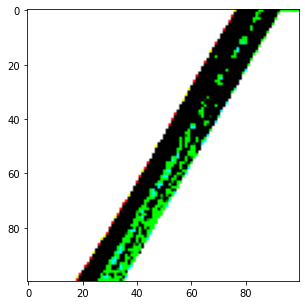

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


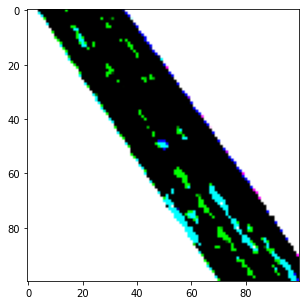

In [45]:
plotImage(t_img[:3],label[:3])

**Model**

In [46]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(100, 100,3), include_top= False)

In [48]:
for layer in base_model.layers:
  layer.trainable = False

In [49]:
X = X = Flatten() (base_model.output)
X = Dense (units= 4, activation='softmax')(X)

model = Model(base_model.input, X)